In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('./vaccine.csv',encoding='cp949')
data.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%)
0,2021.07.27,4150036,74786,3372307,81.2,9381,1293099,31.1
1,2021.07.26,4058839,125490,3297521,81.2,14681,1283718,31.6
2,2021.07.25,4065645,85,3168908,77.9,19,1268914,31.2
3,2021.07.24,4065545,6610,3168820,77.9,2639,1268896,31.2
4,2021.07.23,4065798,27951,3162205,77.8,10128,1266249,31.1


In [23]:
first = data.drop(['접종일','접종대상자','당일 1차접종자 수','1차접종 누계','당일 2차접종자 수',
                  '2차접종 누계','2차접종률(%)'],axis=1)

In [25]:
data = data.drop(['당일 1차접종자 수','1차접종 누계','1차접종률(%)','당일 2차접종자 수',
                  '2차접종 누계','2차접종률(%)'],axis=1)
data

,접종일,접종대상자
0,2021.07.27,4150036
1,2021.07.26,4058839
2,2021.07.25,4065645
3,2021.07.24,4065545
4,2021.07.23,4065798
...,...,...
93,2021.04.25,1023346
94,2021.04.24,1023346
95,2021.04.23,1027740
96,2021.04.22,1023538


In [67]:
df04 = pd.DataFrame(data)
df04 = df04[data['접종일'].str.contains('21.04')]
df04 = df04.sort_index(ascending=False)
df04.set_index('접종일',inplace=True)

In [68]:
df05 = pd.DataFrame(data)
df05 = df05[data['접종일'].str.contains('21.05')]
df05 = df05.sort_index(ascending=False)
df05.set_index('접종일',inplace=True)

In [69]:
df06 = pd.DataFrame(data)
df06 = df06[data['접종일'].str.contains('21.06')]
df06 = df06.sort_index(ascending=False)
df06.set_index('접종일',inplace=True)

In [71]:
df07 = pd.DataFrame(data)
df07 = df07[data['접종일'].str.contains('21.07')]
df07 = df07.sort_index(ascending=False)
df07.set_index('접종일',inplace=True)

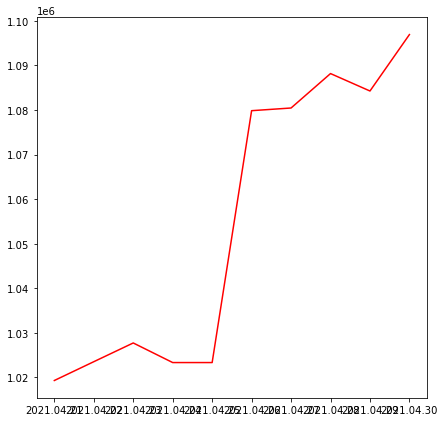

In [79]:
plt.figure(figsize=(7,7))
plt.plot(df04,color='red')
plt.show()

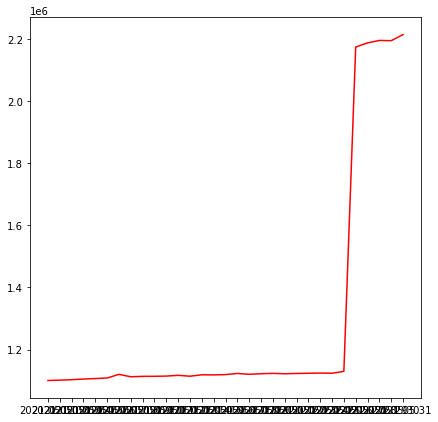

In [80]:
plt.figure(figsize=(7,7))
plt.plot(df05,color='red')
plt.show()

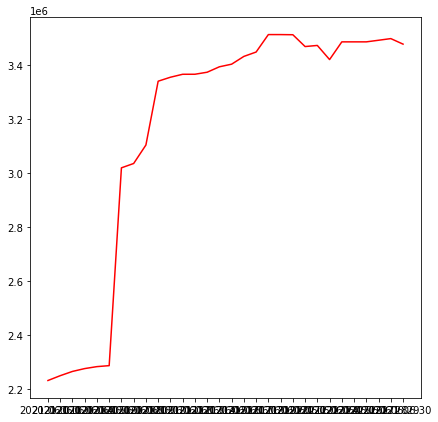

In [81]:
plt.figure(figsize=(7,7))
plt.plot(df06,color='red')
plt.show()

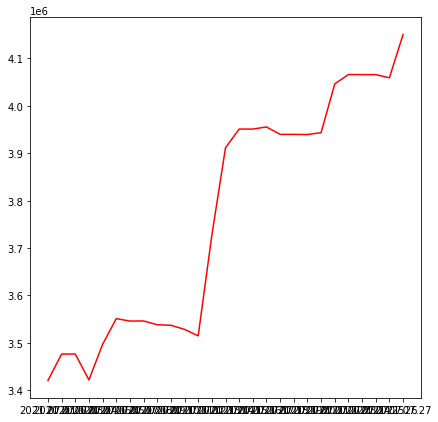

In [82]:
plt.figure(figsize=(7,7))
plt.plot(df07,color='red')
plt.show()

In [87]:
df31 = pd.DataFrame(data)
df31=df31[data['접종일'].str.contains('31')]
df31

,접종일,접종대상자
57,2021.05.31,2215425


In [86]:
df30=pd.DataFrame(data)
df30=df30[data['접종일'].str.contains('30')]
df30=df30.drop(index=[58],axis=0)
df30

,접종일,접종대상자
27,2021.06.30,3475794
88,2021.04.30,1096899


In [88]:
ex=pd.DataFrame(data)
ex=ex[data['접종일'].str.contains('07.27')]
ex

,접종일,접종대상자
0,2021.07.27,4150036


In [89]:
vaccine = pd.concat([df31,df30,ex])
vaccine = vaccine.sort_index(ascending=True)
vaccine

,접종일,접종대상자
0,2021.07.27,4150036
27,2021.06.30,3475794
57,2021.05.31,2215425
88,2021.04.30,1096899


In [97]:
final = pd.DataFrame(vaccine)

final = ((final['접종대상자'].shift(1) - final['접종대상자'])) /final['접종대상자']
final

0          NaN
27    0.193982
57    0.568906
88    1.019716
Name: 접종대상자, dtype: float64

In [94]:
d = {'월별' : ['21.05','21.06','21.07'],
    '증가율':[1.019716,0.568906,0.193982]}

vac = pd.DataFrame(d)
vac.set_index('월별',inplace=True)
vac

,증가율
월별,
21.05,1.019716
21.06,0.568906
21.07,0.193982


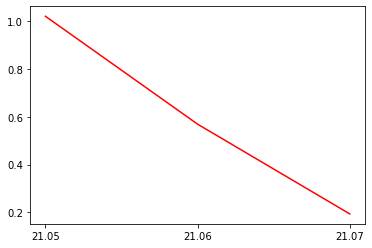

In [93]:
plt.plot(vac,color='red')
plt.show()